# Chapter 3 Visualization

## **Word Cloud - 말뭉치 응용**

In [1]:
! apt-get update
! apt-get install g++ openjdk-8-jdk 
! pip3  install  nltk konlpy wordcloud matplotlib gensim 

! apt-get install fonts-nanum*
! apt-get install fontconfig
! fc-cache -fv
! cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
! rm -rf /content/.cache/matplotlib/*

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.3.0-3ubuntu2.1).
openjdk-8-jdk is already the newest version (8u181-b13-1ubuntu0.18.04.1).
0 upgraded, 0 newly installe

In [0]:
speech_text = "https://raw.githubusercontent.com/YongBeomKim/nltk_tutorial/master/data/pyongyang_fin.txt"
script_text = "https://raw.githubusercontent.com/YongBeomKim/nltk_tutorial/master/data/movie_memories_of_murder_2003.txt"
font_file = "/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicCoding.ttf"

In [0]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.tokenize import word_tokenize

In [4]:
texts = requests.get(speech_text).text
texts[:100]

'존경하는 국민여러분. 성원해 주신 덕분에 평양에 잘 다녀왔습니다. \n\n국민 여러분께서 보셨듯이 정상회담에서 좋은 합의를 이뤘고, 최상의 환대를 받았습니다. 무엇보다 3일동안 김정은'

(-0.5, 399.5, 199.5, -0.5)

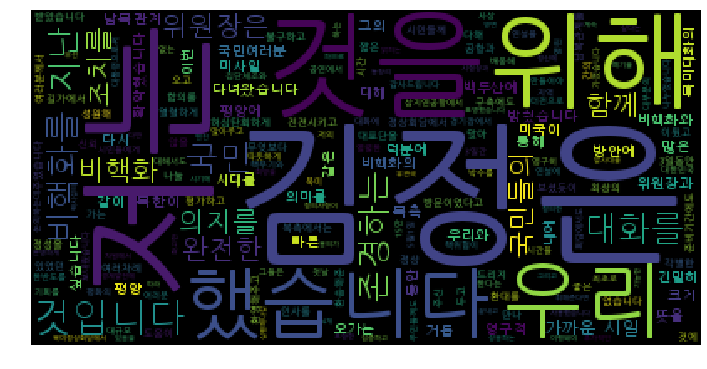

In [5]:
%matplotlib inline
plt.figure(figsize=(12,12))
wcloud = WordCloud(font_file).generate(texts)
plt.imshow(wcloud)
plt.axis("off")

In [6]:
# Token 빈도결과값
tokens  = word_tokenize(texts)
freqtxt = pd.Series(dict(FreqDist(tokens))).sort_values(ascending=False)
freqtxt[:10]

.       46
김정은      7
,        6
저는       6
것을       6
위해       5
수        5
했습니다     4
것입니다     4
우리       4
dtype: int64

<br></br>
## **명사만 추출하여 Wordcloud 만들기**

In [7]:
texts[:100]

'존경하는 국민여러분. 성원해 주신 덕분에 평양에 잘 다녀왔습니다. \n\n국민 여러분께서 보셨듯이 정상회담에서 좋은 합의를 이뤘고, 최상의 환대를 받았습니다. 무엇보다 3일동안 김정은'

In [8]:
# Twitter 모듈을 활용하여 명사만 추출
from konlpy.tag import Okt 
twitter     = Okt()
tokens      = twitter.pos(texts, stem=True)
tokens_noun = [token[0]   for token in tokens  
                          if token[1] == "Noun"]
texts_noun  = " ".join(tokens_noun)
texts_noun[:300]

'존경 국민 여러분 성원 주신 덕분 평양 국민 여러분 정상회담 합의 최상 환대 무엇 김정은 위원장 차례 시간 대화 허심 탄회 수 것 의미 남북관계 크게 진전 두 정상 간의 신뢰 구축 도움 방문 평가 북 준비 기간 불구 우리 대표 단 정성 다해 동안 공항 길가 환영 환송 평양 시민 각별 인사 수 백두산 동안 삼지연공항 배웅 준 지역 주민 감사 저 경기장 대규모 집단체조 공연 평양 시민 대한민국 대통령 사상 최초 연설 기회 그 한반도 영구 핵무기 핵 위협 평화 터전 저 연설 대해 박수 보 존경 국민 여러분 지난 저 김정은 위원장 비핵화 '

(-0.5, 399.5, 199.5, -0.5)

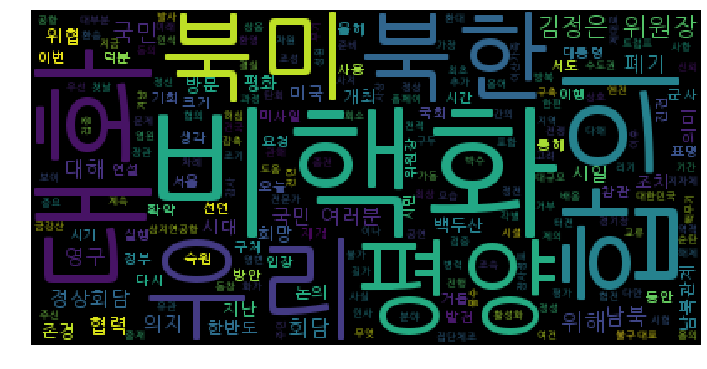

In [9]:
%matplotlib inline
plt.figure(figsize=(12,12))
wcloud = WordCloud(font_file).generate(texts_noun)
plt.imshow(wcloud)
plt.axis("off")

In [10]:
# Token 빈도결과값
tokens_noun  = word_tokenize(texts_noun)
freqtxt      = pd.Series(dict(FreqDist(tokens_noun))).sort_values(ascending=False)
freqtxt[:20]

것      14
비핵화    10
국민     10
위원장     9
대화      8
우리      8
저       8
합의      8
김정은     7
그       7
평양      7
북한      7
북미      7
위해      6
회담      5
수       5
남북      5
대해      5
의지      4
뜻       4
dtype: int64